<a href="https://colab.research.google.com/github/TABARU-muu/2020615076/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import tree

In [ ]:
from IPython.display import Image

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import pydotplus

In [ ]:
import os

In [99]:
W_data = pd.read_csv('/content/drive/MyDrive/AI/weather_forecast.csv')
W_data

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [106]:
W_data.Outlook = W_data.Outlook.replace('Sunny',0)
W_data.Outlook = W_data.Outlook.replace('Overcast',1)
W_data.Outlook = W_data.Outlook.replace('Rain',2)

W_data.Temperature = W_data.Temperature.replace('Hot',3)
W_data.Temperature = W_data.Temperature.replace('Cool',4)
W_data.Temperature = W_data.Temperature.replace('Mild',5)

W_data.Humidity = W_data.Humidity.replace('High',6)
W_data.Humidity = W_data.Humidity.replace('Normal',7)

W_data.Windy = W_data.Windy.replace('Weak',8)
W_data.Windy = W_data.Windy.replace('Strong',9)

W_data.Play = W_data.Play.replace('yes',10)
W_data.Play = W_data.Play.replace('no',11)

W_data

,Outlook,Temperature,Humidity,Windy,Play
0,0,3,6,8,No
1,0,3,6,9,No
2,1,3,6,8,Yes
3,2,5,6,8,Yes
4,2,4,7,8,Yes
5,2,4,7,9,No
6,1,4,7,9,Yes
7,0,5,6,8,No
8,0,4,7,8,Yes
9,2,5,7,8,Yes


In [107]:
X = np.array(pd.DataFrame(W_data, columns=['Outlook',	'Temperature','Humidity','Windy']))
Y = np.array(pd.DataFrame(W_data, columns=['Play']))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [108]:
X_train

array([[1, 5, 6, 9],
       [2, 5, 6, 8],
       [2, 5, 7, 8],
       [0, 3, 6, 9],
       [0, 4, 7, 8],
       [1, 3, 7, 8],
       [1, 4, 7, 9],
       [0, 5, 7, 9],
       [1, 3, 6, 8],
       [0, 3, 6, 8]])

In [109]:
X_test

array([[0, 5, 6, 8],
       [2, 4, 7, 9],
       [2, 4, 7, 8],
       [2, 5, 6, 9]])

In [110]:
Y_train

array([['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No']], dtype=object)

In [111]:
Y_test

array([['No'],
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [112]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, Y_train)
dt_prediction = dt_clf.predict(X_test)

In [114]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
feature_names = W_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['target no', 'target yes'])

In [115]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [116]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

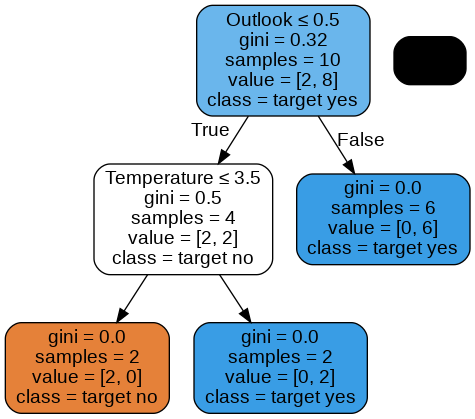

In [117]:
Image(dt_graph.create_png())